# Desicion Tree Regression

CART - Classification and Regression Tree

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Cloumn Names
1. AT - Ambient Temperature in Degree Celsius
2. v - Vacuum Pressure 
3. AP - Atmosphheric Pressure 
4. RH - Relative Humidity (Percentage)
5. PE - Power Output of Plant (MW) - Target

# Step 2 - Basic Data  Quality Checks 

In [3]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(41)

In [5]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [6]:
df.shape

(9527, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# step 3 -  Seprate X and Y (PE)

In [8]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [9]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step  4 - Apply Preprocessing on X

In [11]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [13]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()).set_output(
    transform="pandas"
)

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


In [15]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


# step 5 - Apply Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [17]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [18]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [19]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [20]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [21]:
xtrain.shape

(7621, 4)

In [22]:
xtest.shape

(1906, 4)

# Step 6 - Bulid the model

In [23]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error",
    random_state=42,
)
model1.fit(xtrain, ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [24]:
model1.score(xtrain, ytrain)

0.71765957297802

In [25]:
model1.score(xtest, ytest)

0.7251450398190283

# Hyperparemeter Tuning

In [26]:
params = {
    "max_depth": [8, 9, 10, 11, 12, 13],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
    "criterion": ["squared_error", "absolute_error"],
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
dtr = DecisionTreeRegressor(random_state=42)
rscv_dtr = RandomizedSearchCV(
    dtr, param_distributions=params, cv=5, scoring="r2", random_state=42
)
rscv_dtr.fit(xtrain, ytrain)

,estimator,DecisionTreeR...ndom_state=42)
,param_distributions,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [8, 9, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [29]:
rscv_dtr.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_depth': 10,
 'criterion': 'squared_error'}

In [30]:
rscv_dtr.best_score_

np.float64(0.9405983775141727)

In [31]:
best_dtr = rscv_dtr.best_estimator_
best_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,6
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# Step 8 - Model Evaluation

In [32]:
best_dtr.score(xtrain, ytrain)

0.9634547045114045

In [33]:
best_dtr.score(xtest, ytest)

0.9492545772956021

In [34]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [36]:
def evaluate_model(model, X, y):
    ypred = model.predict(X)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [37]:
print("Test Results : ")
evaluate_model(best_dtr, xtest, ytest)

Test Results : 
RMSE : 3.91
MAE : 2.89
MAPE : 0.64%
R2 : 94.93%


# Fromabove results i can say that this model is good and can be used for out of sample prediction

In [38]:
# R2 >0.8 both in train , test and cross validation

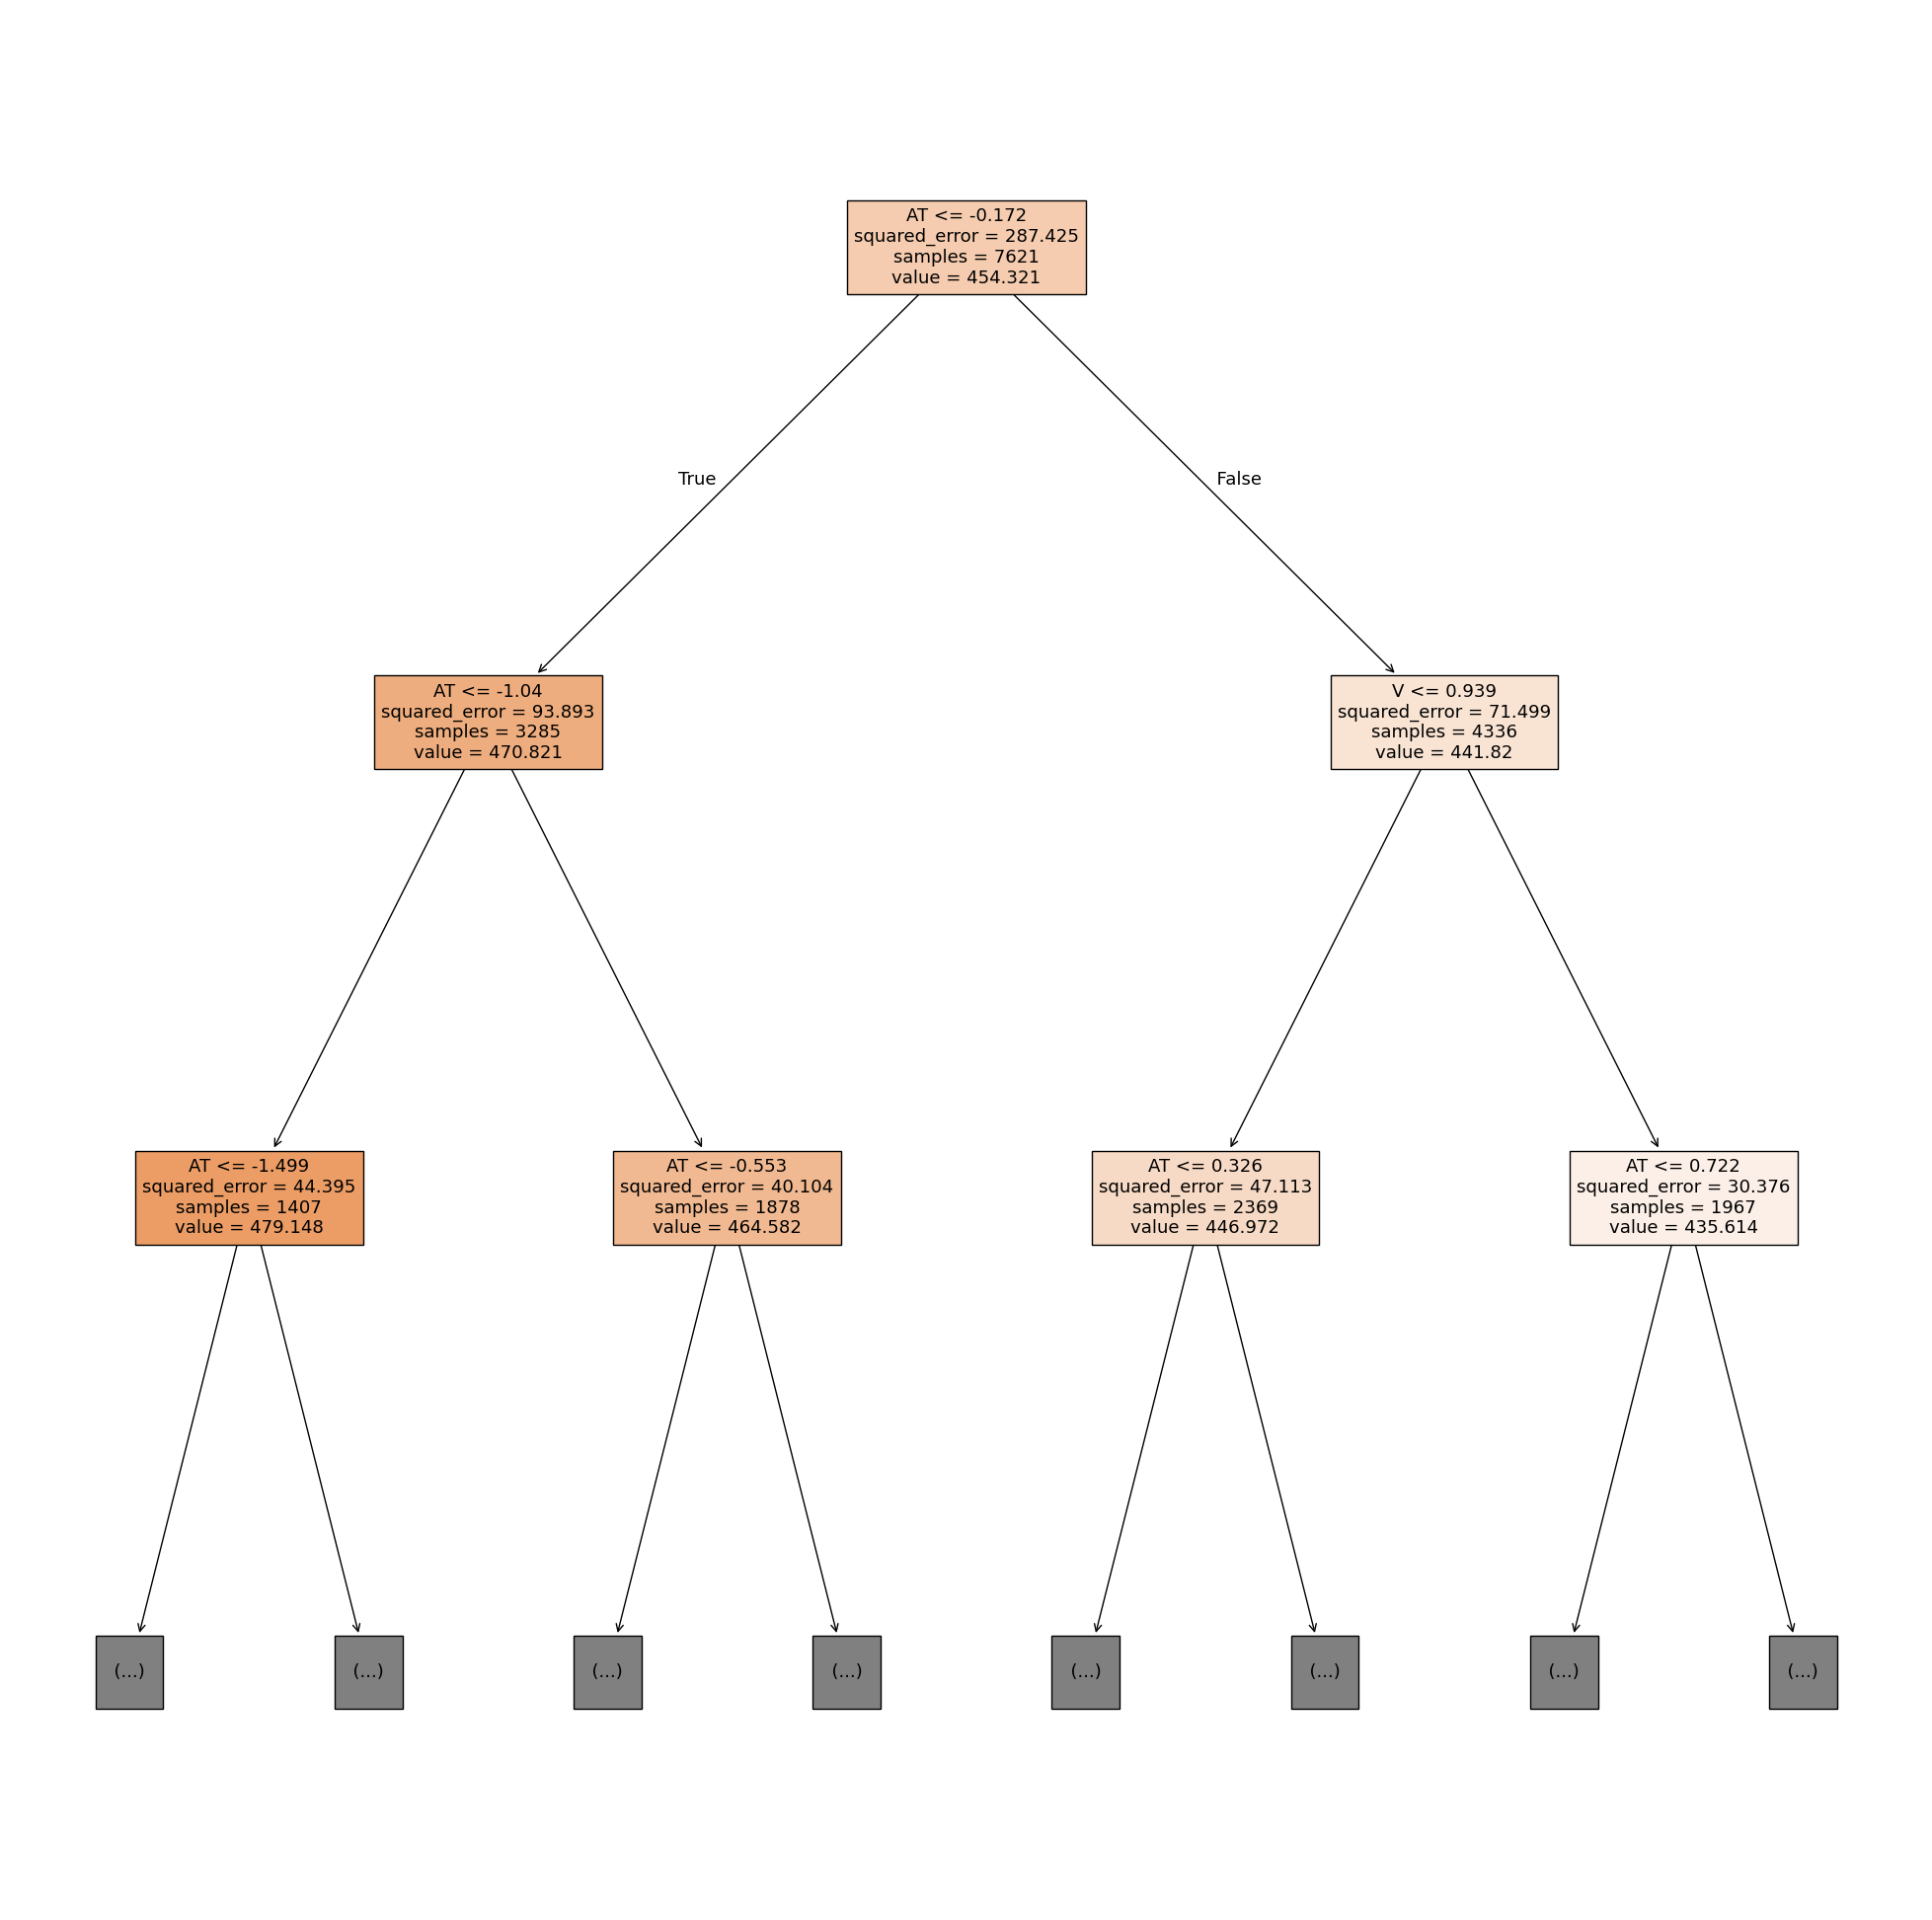

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 25))
plot_tree(best_dtr, feature_names=xtrain.columns, filled=True, max_depth=2)
plt.show()

# Feature importances

In [40]:
imp = best_dtr.feature_importances_
imp

array([0.89418641, 0.0870706 , 0.01099511, 0.00774788])

In [41]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [43]:
feat_imp = pd.Series(imp, index=xtrain.columns).sort_values(ascending=False).round(4)
feat_imp

AT    0.8942
V     0.0871
AP    0.0110
RH    0.0077
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

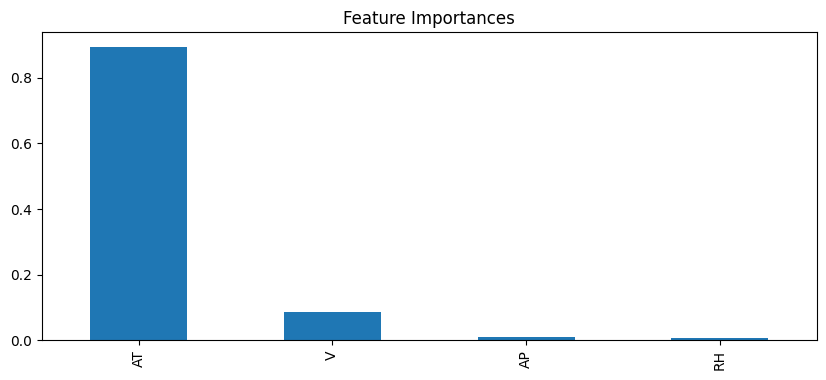

In [44]:
feat_imp.plot(kind="bar", title="Feature Importances", figsize=(10, 4))

# Step 9 - Out of Sample prediction

In [45]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [46]:
xnew.shape

(100, 4)

In [47]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [48]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [49]:
preds = best_dtr.predict(xnew_pre)
preds[0:5]

array([444.97294118, 438.15909091, 432.79066667, 442.79914286,
       465.58888889])

In [50]:
xnew["PE_pred"] = preds.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,444.97
1,28.88,54.89,1007.16,46.60,438.16
2,27.89,73.21,1001.32,85.88,432.79
3,25.69,62.26,1011.38,74.08,442.80
4,12.16,40.81,1025.79,70.97,465.59
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,433.74
96,11.78,39.96,1011.37,82.95,475.03
97,5.62,41.38,1020.91,86.21,489.02
98,24.96,74.99,1008.25,80.52,436.77


In [51]:
xnew.to_csv("dtr_results.csv", index=False)

<Axes: xlabel='PE_pred', ylabel='Count'>

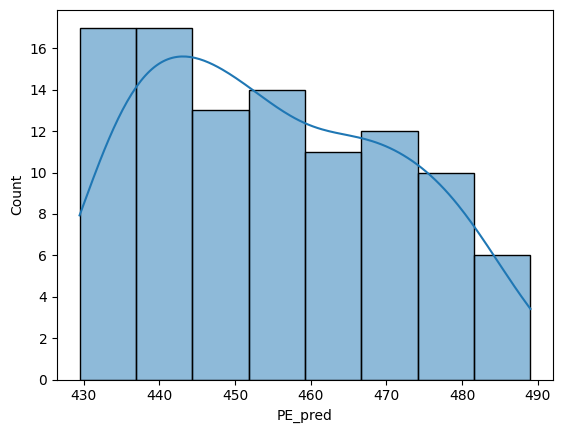

In [52]:
import seaborn as sns

sns.histplot(data=xnew, x="PE_pred", kde=True)

# Step 10 - Save the preprocessor and modeel object

In [53]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [54]:
best_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,6
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [55]:
import joblib

In [56]:
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [57]:
joblib.dump(best_dtr, "dtr_model.joblib")

['dtr_model.joblib']

# Load the Model object

In [58]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [59]:
m = joblib.load("dtr_model.joblib")
m

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,6
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [60]:
m.score(xtest, ytest)

0.9492545772956021